In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from io import BytesIO
from urllib.request import urlopen
import requests
import PIL

In [3]:
# Path to files
df = pd.read_csv('all_drinks.csv')

In [4]:
# Here he removes the first column "Unnamed" from both DataFrame and list of columns

cols = df.columns
cols = cols[1:]
df = pd.DataFrame(np.array(df)[:,1:])
df.columns = cols

In [5]:
# Cleaning DataFrame for multiple instances of same glass type:

for i, row in df.iterrows():
    
    row['strGlass'] = row['strGlass'].lower()
    
    if (row['strGlass'] == 'beer mug') or (row['strGlass'] == 'beer pilsner'):
        row['strGlass'] = 'beer glass'
        
    if row['strGlass'] == 'margarita glass':
        row['strGlass'] = 'margarita/coupette glass'
        
    if row['strGlass'] == 'white wine glass':
        row['strGlass'] = 'wine glass'
        
data = np.array(df)

In [6]:
print(df.shape)
df.head()

(546, 40)


,strDrink,dateModified,idDrink,strAlcoholic,strCategory,strDrinkThumb,strGlass,strIBA,strIngredient1,strIngredient10,...,strMeasure15,strMeasure2,strMeasure3,strMeasure4,strMeasure5,strMeasure6,strMeasure7,strMeasure8,strMeasure9,strVideo
0,'57 Chevy with a White License Plate,2016-07-18 22:49:04,14029,Alcoholic,Cocktail,http://www.thecocktaildb.com/images/media/drin...,highball glass,NaN,Creme de Cacao,NaN,...,NaN,1 oz,,,,,,NaN,NaN,NaN
1,1-900-FUK-MEUP,2016-07-18 22:27:04,15395,Alcoholic,Shot,http://www.thecocktaildb.com/images/media/drin...,old-fashioned glass,NaN,Absolut Kurant,NaN,...,NaN,1/4 oz,1/4 oz,1/4 oz,1/4 oz,1/4 oz,1/2 oz,1/4 oz,,NaN
2,110 in the shade,2016-02-03 14:51:57,15423,Alcoholic,Beer,http://www.thecocktaildb.com/images/media/drin...,beer glass,NaN,Lager,NaN,...,NaN,1.5 oz,,,,,,NaN,NaN,NaN
3,151 Florida Bushwacker,2016-07-18 22:28:43,14588,Alcoholic,Milk / Float / Shake,http://www.thecocktaildb.com/images/media/drin...,beer glass,NaN,Malibu rum,NaN,...,NaN,1/2 oz,1/2 oz Bacardi,1 oz,1 oz,3 oz,1 oz,1 cup,,NaN
4,155 Belmont,2016-10-05 12:36:28,15346,Alcoholic,Cocktail,http://www.thecocktaildb.com/images/media/drin...,wine glass,NaN,Dark rum,NaN,...,NaN,2 shots,1 shot,1 shot,,,,,,NaN


In [7]:
# We extract the list of unique glass types after we have cleaned:

unique_glasses = []
glasses = np.array(df['strGlass'])

unique_glasses_temp, counts_temp = np.unique(glasses, return_counts=True)
c = np.asarray((unique_glasses_temp, counts_temp)).T

for i in range(len(unique_glasses_temp)):
    if counts_temp[i] > 7:
        unique_glasses.append(unique_glasses_temp[i])


unique_glasses = np.array(unique_glasses)
unique_glasses

array(['beer glass', 'champagne flute', 'cocktail glass', 'coffee mug',
       'collins glass', 'highball glass', 'old-fashioned glass',
       'punch bowl', 'shot glass', 'whiskey sour glass', 'wine glass'],
      dtype='<U19')

In [8]:
c

array([['beer glass', 13],
       ['brandy snifter', 3],
       ['champagne flute', 13],
       ['cocktail glass', 125],
       ['coffee mug', 23],
       ['collins glass', 93],
       ['copper mug', 1],
       ['cordial glass', 1],
       ['highball glass', 106],
       ['hurricane glass', 7],
       ['irish coffee cup', 6],
       ['jar', 1],
       ['margarita/coupette glass', 5],
       ['martini glass', 3],
       ['mason jar', 2],
       ['old-fashioned glass', 55],
       ['parfait glass', 1],
       ['pint glass', 7],
       ['pitcher', 5],
       ['pousse cafe glass', 2],
       ['punch bowl', 12],
       ['shot glass', 37],
       ['whiskey sour glass', 17],
       ['wine glass', 8]], dtype=object)

## WordClouds

In [79]:
unique_glasses

array(['beer glass', 'champagne flute', 'cocktail glass', 'coffee mug',
       'collins glass', 'highball glass', 'old-fashioned glass',
       'punch bowl', 'shot glass', 'whiskey sour glass', 'wine glass'],
      dtype='<U19')

In [9]:
import string
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
import re

In [10]:
punctuation = string.punctuation + '…'

def map_punctuation(s):
    return np.array([char not in punctuation for char in s])

token_arrays = np.empty(len(unique_glasses),object)
token_arrays.fill([])

In [12]:
# Glass types is found in column 6

for i, row in enumerate(data):
    if row[6] in unique_glasses:
        glass_i = np.where(unique_glasses == row[6])[0][0] # This line finds which index in unique_glasses, this is
        s = row[23] # s is the instruction
        if isinstance(s, str):
            tokens = word_tokenize(s)
            # Remove Numbers:
            tokens = np.array([token for token in tokens if not bool(re.search(r'\d+', token))])
            # Remove Punctuation:
            tokens = np.array([token.translate(str.maketrans('', '', punctuation)) for token in tokens if all(map_punctuation(token))])
            # Remove Stopwords:
            tokens = np.array([token.lower() for token in tokens if token not in stopwords.words('english')])
            for token in tokens:
                token_arrays[glass_i] = np.append(token_arrays[glass_i], token)
            

In [13]:
# We now have an array of arrays. Each array corresponds to a glass-type in unique_glasses
# I.e. token_arrays[0] corresponds to all the words in Instructions for unique_glasses[0] which is "Beer Glass"

token_arrays[0]

array(['drop', 'shooter', 'glass', 'fill', 'beer', 'combine',
       'ingredients', 'blend', 'smooth', 'garnish', 'chocolate',
       'shavings', 'desired', 'fill', 'glass', 'ice', 'fish', 'add',
       'vodka', 'grape', 'soda', 'orange', 'juice', 'do', 'not', 'stir',
       'serve', 'well', 'chilled', 'carefully', 'avoid', 'explosive',
       'head', 'formation', 'pour', 'beer', 'glass', 'half', 'full',
       'favorite', 'rootbeer', 'top', 'guinness', 'scoop', 'two', 'large',
       'scoops', 'vanilla', 'frosted', 'beer', 'mug', 'next', 'add',
       'ounces', 'maker', 'mark', 'then', 'pour', 'coke', 'gently',
       'stir', 'enjoy', 'pour', 'corona', 'beer', 'glass', 'pour',
       'bacardi', 'limon', 'beer', 'stir', 'gently', 'blend', 'together',
       'blender', 'serve', 'chilled', 'beer', 'mug', 'fresh',
       'blueberries', 'caramel', 'topping', 'use', 'oz', 'glass', 'add',
       'campari', 'first', 'fill', 'beer', 'pour', 'corona', 'beer',
       'glass', 'pour', 'rum', 'bee

In [14]:
tf_idfs = []
# Construct a lists of unique tokens for a significant speed-up in calculating idf
unique_lists = []

for tokens in token_arrays:
    unique_lists.append(np.unique(tokens))

for tokens in token_arrays:
    # Get counts for all tokens
    unique, counts = np.unique(tokens, return_counts=True)
    # Calculate tf
    tf = counts / len(counts)
    # Calculate idf
    occurrences = np.array([np.sum([int(token in l) for l in unique_lists]) for token in unique])
    idf = np.log10(len(token_arrays) / occurrences)
    tf_idfs.append(zip(unique, tf * idf))

In [15]:
for i in range(len(tf_idfs)):
    tmp = sorted(tf_idfs[i], key=lambda t: t[1])
    tmp.reverse()
    tf_idfs[i] = tmp

In [19]:
tf_idfs

[[('beer', 0.05532072847436888),
  ('bottle', 0.03629228870069823),
  ('corona', 0.03062919662230074),
  ('turn', 0.014516915480279292),
  ('mug', 0.011064145694873776),
  ('whisky', 0.01020973220743358),
  ('unplug', 0.01020973220743358),
  ('thumb', 0.01020973220743358),
  ('specific', 0.01020973220743358),
  ('real', 0.01020973220743358),
  ('plug', 0.01020973220743358),
  ('ounces', 0.01020973220743358),
  ('open', 0.01020973220743358),
  ('no', 0.01020973220743358),
  ('neck', 0.01020973220743358),
  ('mixinginstructions', 0.01020973220743358),
  ('mark', 0.01020973220743358),
  ('limon', 0.01020973220743358),
  ('ingredient', 0.01020973220743358),
  ('hand', 0.01020973220743358),
  ('formation', 0.01020973220743358),
  ('fish', 0.01020973220743358),
  ('favorite', 0.01020973220743358),
  ('explosive', 0.01020973220743358),
  ('empty', 0.01020973220743358),
  ('cl', 0.01020973220743358),
  ('caramel', 0.01020973220743358),
  ('blueberries', 0.01020973220743358),
  ('avoid', 0.0102

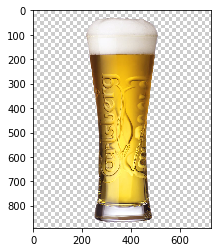

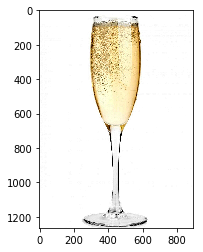

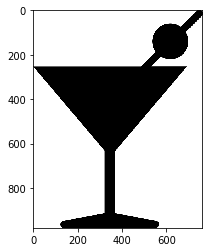

In [91]:
# Create Masks

response_beer = requests.get('https://c7.uihere.com/files/898/72/993/carlsberg-group-beer-glasses-copenhagen-beer.jpg')
mask_beer = np.array(PIL.Image.open(BytesIO(response_beer.content)))

response_champagne = requests.get('http://clipartbarn.com/wp-content/uploads/2016/12/Champagne-glass-champagne-january-clipart-kid.jpg')
mask_champagne = np.array(PIL.Image.open(BytesIO(response_champagne.content)))
    
response_cocktail = requests.get('https://carlisletheacarlisletheatre.org/images/martini-glass-clipart-wine-2.png')
mask_cocktail = np.array(PIL.Image.open(BytesIO(response_cocktail.content)))

In [140]:
from wordcloud import WordCloud

use_masks = True

wordclouds = []

for i in range(len(tf_idfs)):
    # Calculate the sum of tf-idf values
    tf_idf_sum = np.sum([tf_idf for _, tf_idf in tf_idfs[i]])
    # Init list for words
    words = []
    # Init list of probabilities for words to occur
    dist_map = []

    # Loop over tuples
    for w, tf_idf in tf_idfs[i]:
        words.append(w)
        dist_map.append(tf_idf / tf_idf_sum)
    
    # Number of iterations
    N = 10000
    # Choose N words according to probabilities proportional to their tf-idf values
    w = np.random.choice(words, N, p=dist_map)
    str = " ".join(w)
    
    if use_masks:
        if unique_glasses[i] == 'beer glass':
            wordcloud = WordCloud(collocations=False, mask=mask_beer, background_color='white', width=1000, height=1000).generate(str)
        elif unique_glasses[i] == 'champagne flute':
            wordcloud = WordCloud(collocations=False, mask=mask_champagne, background_color='white', width=1000, height=1000).generate(str)
        elif unique_glasses[i] == 'cocktail glass':
            wordcloud = WordCloud(collocations=False, mask=mask_cocktail, background_color='white', width=1000, height=1000).generate(str)
        else:
            wordcloud = WordCloud(collocations=False, background_color='white', width=1000, height=1000).generate(str)
            
    else: 
        wordcloud = WordCloud(collocations=False, background_color='white', width=1000, height=1000).generate(str)
        
    wordclouds.append(wordcloud)
    
    print(unique_glasses[i])


beer glass
champagne flute
cocktail glass
coffee mug
collins glass
highball glass
old-fashioned glass
punch bowl
shot glass
whiskey sour glass
wine glass


## Instructions-Glasstypes

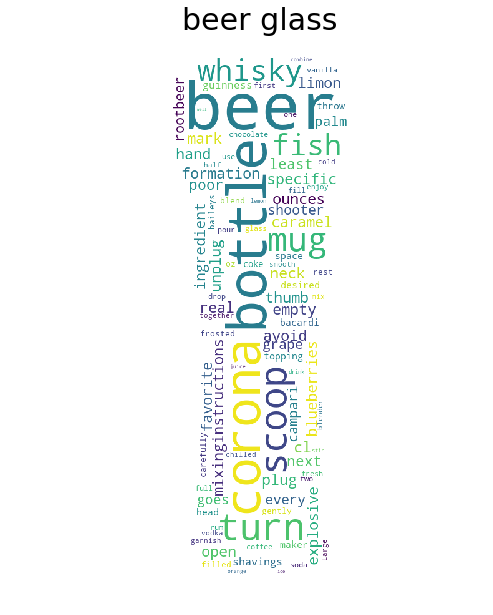

In [141]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordclouds[0]) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.title(unique_glasses[0], fontsize=30)
  
plt.show() 

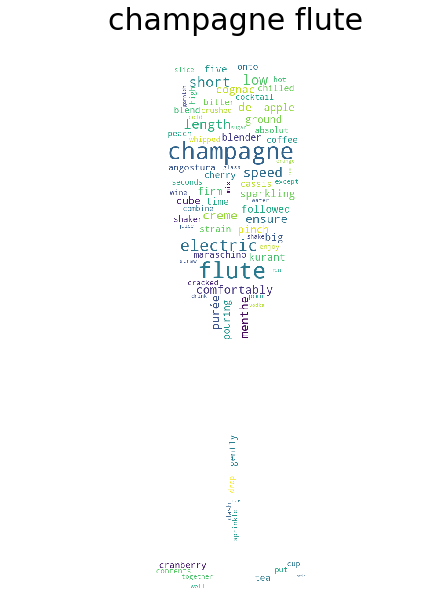

In [142]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordclouds[1]) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.title(unique_glasses[1], fontsize=30)
  
plt.show()

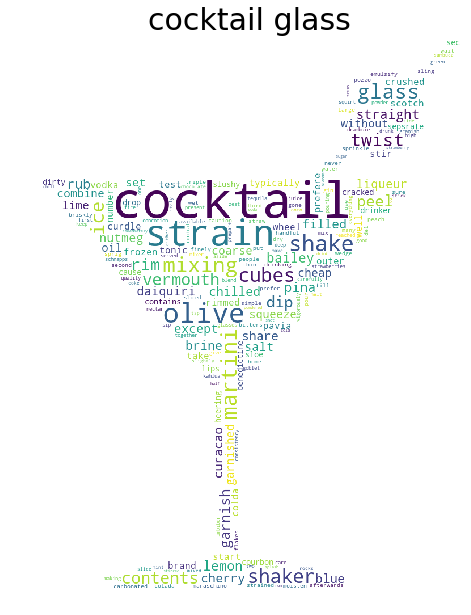

In [143]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordclouds[2]) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.title(unique_glasses[2], fontsize=30)
  
plt.show() 

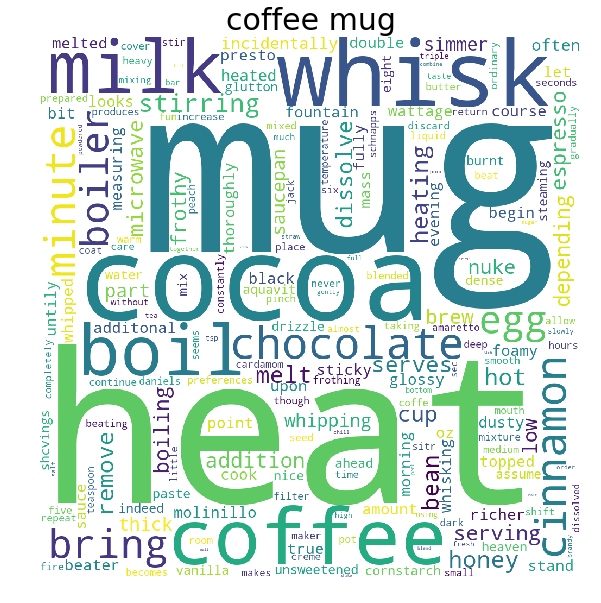

In [145]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordclouds[3]) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.title(unique_glasses[3], fontsize=30)
  
plt.show() 

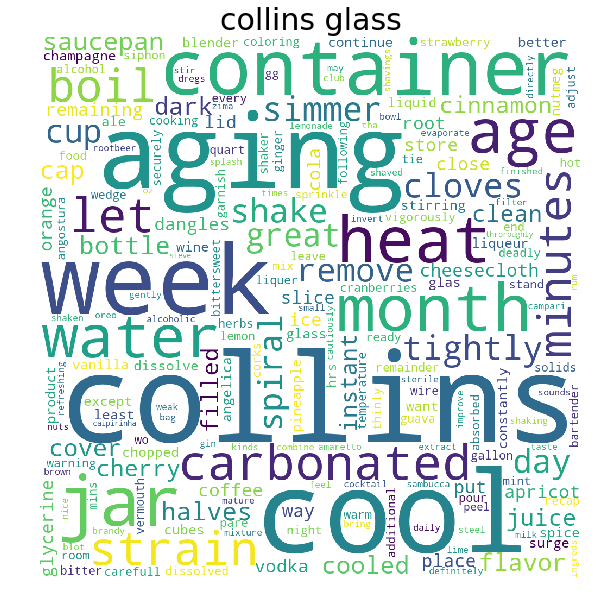

In [146]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordclouds[4]) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.title(unique_glasses[4], fontsize=30)
  
plt.show() 

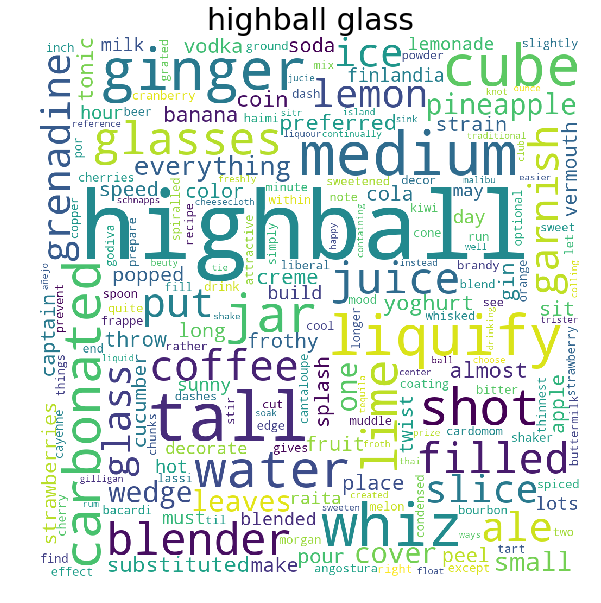

In [147]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordclouds[5]) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.title(unique_glasses[5], fontsize=30)
  
plt.show() 

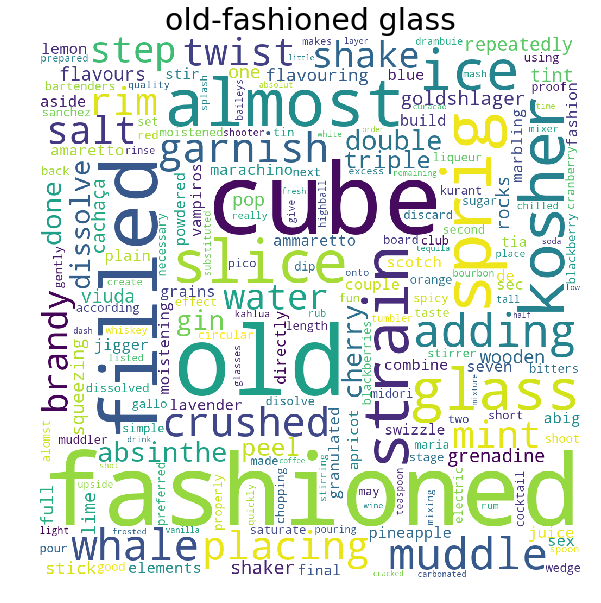

In [148]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordclouds[6]) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.title(unique_glasses[6], fontsize=30)
  
plt.show() 

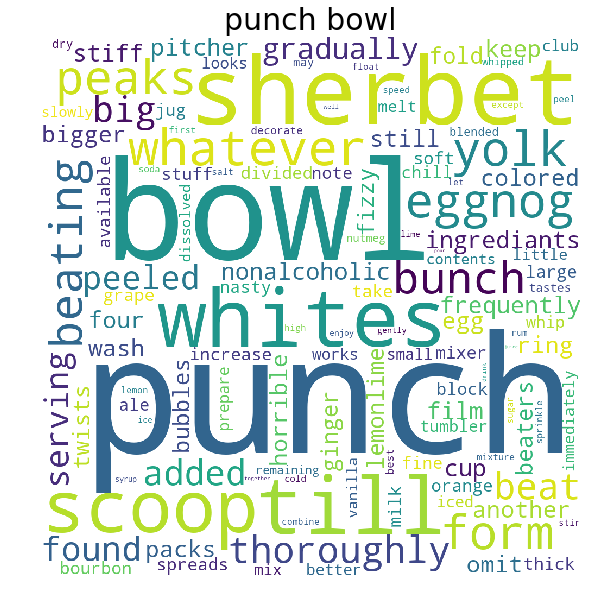

In [149]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordclouds[7]) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.title(unique_glasses[7], fontsize=30)
  
plt.show() 

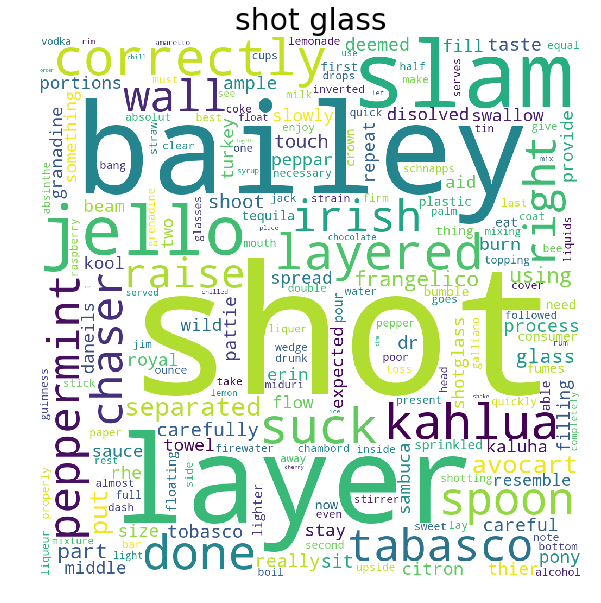

In [150]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordclouds[8]) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.title(unique_glasses[8], fontsize=30)
  
plt.show() 

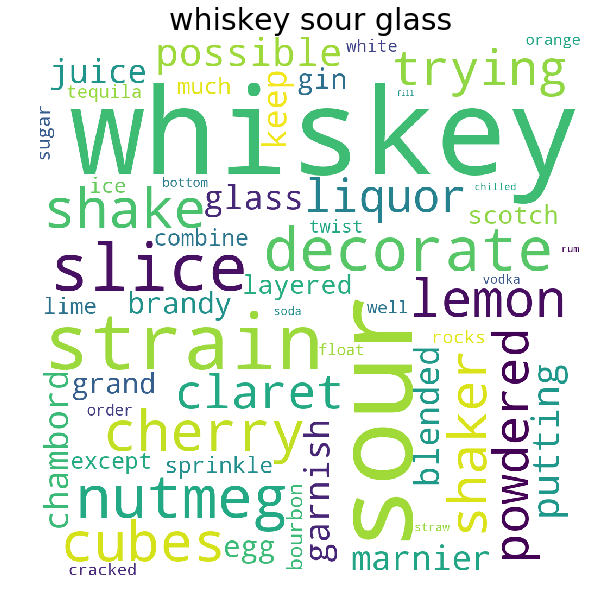

In [151]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordclouds[9]) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.title(unique_glasses[9], fontsize=30)
  
plt.show() 